# Pymaceuticals Inc.
---

### Analysis

- After calculating for potential outliers for tumor volume in mice across four different drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. The output provides the interquartile range (IQR), lower bound, upper bound, and any potential outliers for each treatment. Analysis of the results shows the following: 
    - Capomulin, Ceftamin, and Ramicane: No potential outliers
    - Infubinol: One potential outlier with a value of 36.32. Further investigation may be needed for the potential outlier to ensure data accuracy. The absence of potential outliers in the other regimens suggests that the majority of the data points fall within the expected range.

- A correlation coefficient of 0.841936342469472 indicates a strong positive correlation between the two variables being analyzed. In this case, it refers to the correlation between mouse weight and the average observed tumor volume for the entire Capomulin regimen. The data suggests a relatively strong positive linear relationship between mouse weight and average tumor volume. As mouse weight increases, the average observed tumor volume tends to increase as well.
 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, linregress
import pprint as pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data[combined_data['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_data['Mouse ID'].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. array(['g989'], dtype=object)
duplicat_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids = duplicat_mice['Mouse ID'].unique()

print("Duplicate Mouse IDs: ")
print(duplicate_mouse_ids)

Duplicate Mouse IDs: 
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
all_duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_duplicates_removed = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
mouse_data_duplicates_removed.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(mouse_data_duplicates_removed['Mouse ID'].unique())
number_of_mice

249

In [7]:
mouse_data_duplicates_removed[mouse_data_duplicates_removed['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
870,g989,25,56.045564,1,Propriva,Female,21,26
871,g989,30,59.082294,1,Propriva,Female,21,26
872,g989,35,62.570880,2,Propriva,Female,21,26


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = mouse_data_duplicates_removed.groupby('Drug Regimen').agg(
    **{
        'Mean Tumor Volume': ('Tumor Volume (mm3)', 'mean'),
        'Median Tumor Volume': ('Tumor Volume (mm3)', 'median'),
        'Tumor Volume Variance': ('Tumor Volume (mm3)', 'var'),
        'Tumor Volume Std. Dev.': ('Tumor Volume (mm3)', 'std'),
        'Tumor Volume Std. Err.': ('Tumor Volume (mm3)', 'sem'),
    }
)

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

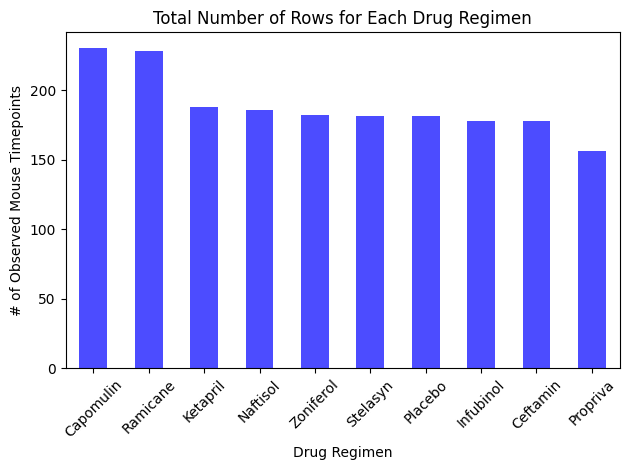

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_data_duplicates_removed['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar', color='blue', alpha=0.7)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

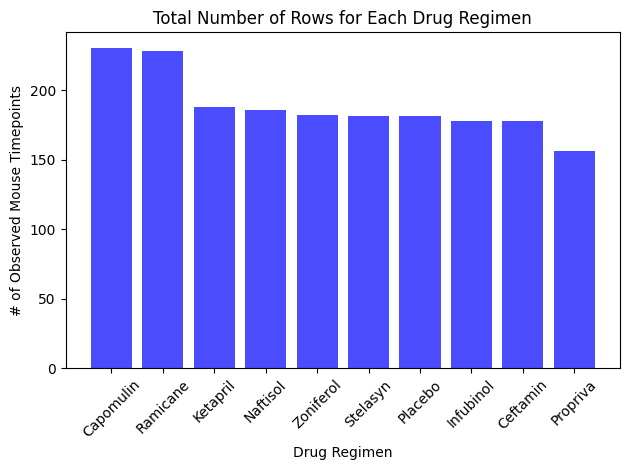

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(regimen_counts.index, regimen_counts, color='blue', alpha=0.7)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


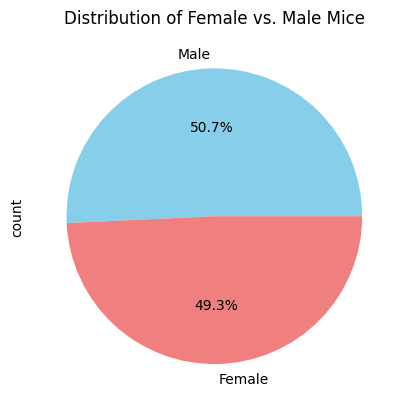

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the distribution of male and female mice
sex_distribution = mouse_data_duplicates_removed['Sex'].value_counts()
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Set the title
plt.title('Distribution of Female vs. Male Mice')

# Display the pie chart
plt.show()

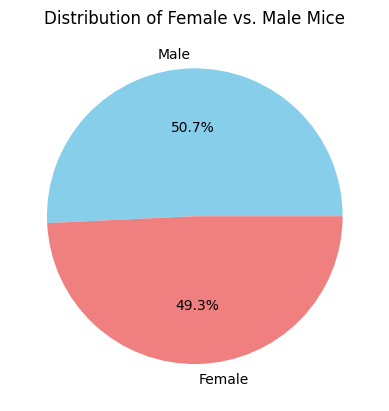

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a pie chart
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Set the title
plt.title('Distribution of Female vs. Male Mice')

# Display the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoints = mouse_data_duplicates_removed.groupby('Mouse ID')['Timepoint'].max()

final_tumor_volume = pd.merge(last_timepoints.reset_index(), mouse_data_duplicates_removed, on=['Mouse ID', 'Timepoint'], how ='left')

treatments_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatments_of_interest)]

final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for treatment in treatments_of_interest:
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)' ]

    tumor_vol_data.append(tumor_vol)

    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"Results for {treatment}:")
    print(f"  IQR: {iqr}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Potential Outliers: {outliers.tolist()}\n")




Results for Capomulin:
  IQR: 7.781863460000004
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Potential Outliers: []

Results for Ramicane:
  IQR: 9.098536719999998
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Potential Outliers: []

Results for Infubinol:
  IQR: 11.477135160000003
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Potential Outliers: [36.3213458]

Results for Ceftamin:
  IQR: 15.577752179999997
  Lower Bound: 25.355449580000002
  Upper Bound: 87.66645829999999
  Potential Outliers: []



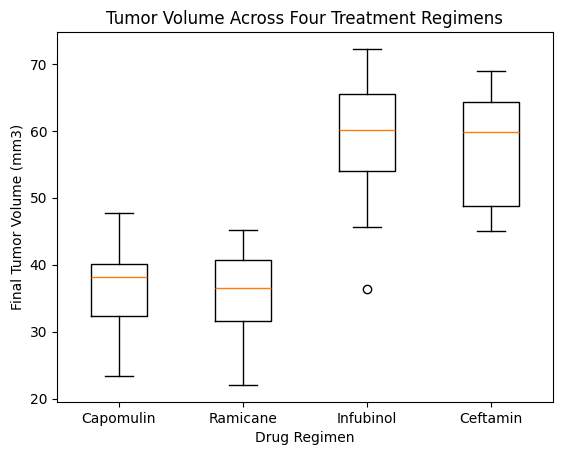

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments_of_interest)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume Across Four Treatment Regimens')
plt.show()

## Line and Scatter Plots

In [ ]:
capomulin_mice = mouse_data_duplicates_removed.groupby

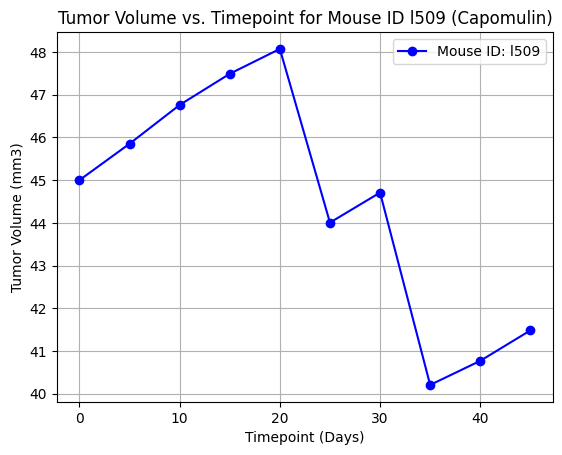

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21
1726,l509,25,44.006257,2,Capomulin,Male,17,21
1727,l509,30,44.708055,2,Capomulin,Male,17,21
1728,l509,35,40.207288,2,Capomulin,Male,17,21
1729,l509,40,40.770813,2,Capomulin,Male,17,21
1730,l509,45,41.483008,3,Capomulin,Male,17,21


In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin. 

mouse_id_of_interest = 'l509'

capomulin_data_one = mouse_data_duplicates_removed[(mouse_data_duplicates_removed['Drug Regimen'] == 'Capomulin') & (mouse_data_duplicates_removed['Mouse ID'] == mouse_id_of_interest)]

plt.plot(capomulin_data_one['Timepoint'], capomulin_data_one['Tumor Volume (mm3)'], marker='o', color='blue', label=f'Mouse ID: {mouse_id_of_interest}', linestyle='-')

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Timepoint for Mouse ID {mouse_id_of_interest} (Capomulin)')
plt.legend()
plt.grid(True)

plt.show()

capomulin_data_one

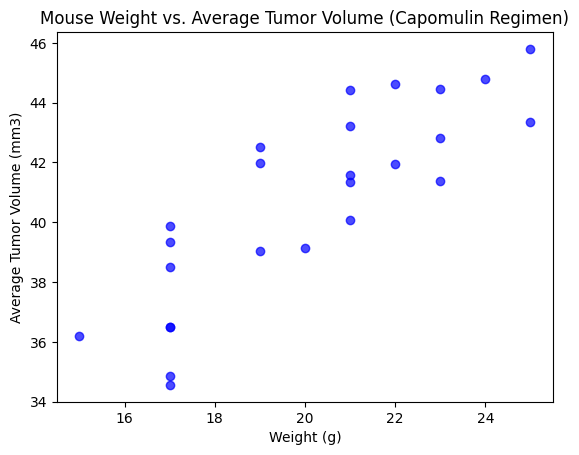

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame to include only data for the Capomulin regimen
capomulin_data = mouse_data_duplicates_removed[mouse_data_duplicates_removed['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the original Capomulin data to get mouse weight
capomulin_avg_data = pd.merge(average_tumor_volume.reset_index(), capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Generate a scatter plot
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Customize the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Display the plot
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.841936342469472


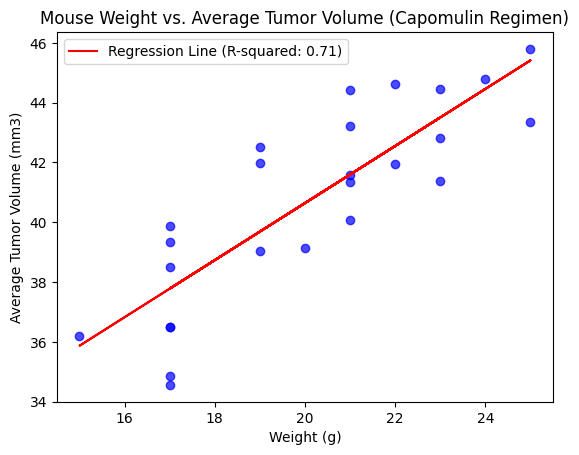

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame to include only data for the Capomulin regimen
capomulin_data = mouse_data_duplicates_removed[mouse_data_duplicates_removed['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the original Capomulin data to get mouse weight
capomulin_avg_data = pd.merge(average_tumor_volume.reset_index(), capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])

# Generate a scatter plot with the regression line
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)
regress_line = slope * capomulin_avg_data['Weight (g)'] + intercept
plt.plot(capomulin_avg_data['Weight (g)'], regress_line, color='red', label=f'Regression Line (R-squared: {r_value**2:.2f})')

# Customize the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.legend()

# Display the plot
plt.show()